# **Vertexai Init**

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [2]:
PROJECT_ID = "gen-lang-client-0341374211"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

if "google.colab" in sys.modules:
    # Define project information
    PROJECT_ID = PROJECT_ID
    LOCATION = LOCATION

    # Initialize Vertex AI
    import vertexai
    vertexai.init(project=PROJECT_ID, location=LOCATION)

In [3]:
search_query = """Sea food near Googleplex
1600 Amphitheatre Parkway
Mountain View, CA 94043
United States"""
#'how to make a great pastrami sandwich'

# **Realtime Google Search with Langchain**

In [4]:
!pip install -U duckduckgo_search
!python3 -m pip install googlesearch-python
!pip install -q langchain playwright beautifulsoup4 html2text

In [5]:
search_query = 'Sea food near Googleplex\n1600 Amphitheatre Parkway\nMountain View, CA 94043\nUnited States'

In [6]:
google_search_results = []
structured_response = []

In [7]:
number_of_results = 2
from googlesearch import search
results = search(search_query, lang="en", num_results=number_of_results)

In [8]:
for result in results:
  if not result.startswith("https://www.tripadvisor.com"):
    google_search_results.append(result)

In [9]:
google_search_results

['https://www.yelp.com/search?cflt=seafood&find_loc=Mountain+View%2C+CA+94043',
 'https://us.trip.com/travel-guide/mountain-view-34682-restaurant/googleplex-18697240/']

In [10]:
import html2text
from langchain.document_loaders import AsyncHtmlLoader
from langchain.document_transformers import Html2TextTransformer

async def do_webscraping(link):
    try:
        urls = [link]
        loader = AsyncHtmlLoader(urls)
        docs = loader.load()

        html2text_transformer = Html2TextTransformer()
        docs_transformed = html2text_transformer.transform_documents(docs)

        if docs_transformed != None and len(docs_transformed) > 0:
            metadata = docs_transformed[0].metadata
            title = metadata.get('title', '')
            return {
                'summary': docs_transformed[0].page_content,
                'title': title,
                'metadata': metadata,
                'clean_content': html2text.html2text(docs_transformed[0].page_content)
            }
        else:
            return None

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [11]:
for link in google_search_results:
  print(link)
  response = await do_webscraping(link)
  if response != None:
    structured_response.append(response)

https://www.yelp.com/search?cflt=seafood&find_loc=Mountain+View%2C+CA+94043


Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.22s/it]


https://us.trip.com/travel-guide/mountain-view-34682-restaurant/googleplex-18697240/


Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.66s/it]


In [12]:
structured_response

[{'summary': 'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recom

## **Quick Function Test**

In [13]:
!pip install requests html2text beautifulsoup4

In [14]:
import requests
from bs4 import BeautifulSoup
import html2text

def scrape_website(url):
    try:
        # Send an HTTP request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            return html2text.html2text(response.text)

        else:
            print(f"Failed to retrieve content. Status code: {response.status_code}")

    except Exception as e:
        print(f"An error occurred: {e}")

https://www.google.com/search?q=Sea food near Googleplex
1600 Amphitheatre Parkway
Mountain View, CA 94043
United States


"[Google](/?sa=X&ved=0ahUKEwjgq5Hp_aGDAxUlSjABHVEPBMYQOwgC)\n\n×\n\nPlease click\n[here](/search?q=Sea+food+near+Googleplex%0A1600+Amphitheatre+Parkway%0AMountain+View,+CA+94043%0AUnited+States&sca_esv=0905b5e61dfd1a4f&sca_upv=1&ie=UTF-8&gbv=1&sei=fvKEZeD0BKWUwbkP0Z6QsAw)\nif you are not redirected within a few seconds.\n\nAll[Maps](/url?q=https://maps.google.com/maps%3Fq%3DSeafood%2Bnear%2BGoogleplex%250A1600%2BAmphitheatre%2BParkway%250AMountain%2BView,%2BCA%2B94043%250AUnited%2BStates%26um%3D1%26ie%3DUTF-8&opi=89978449&sa=U&ved=0ahUKEwjgq5Hp_aGDAxUlSjABHVEPBMYQiaAMCAYoAQ&usg=AOvVaw0QB7Fpdtc19-7bMUKHFjT8)[Videos](/search?q=Seafood+near+Googleplex%0A1600+Amphitheatre+Parkway%0AMountain+View,+CA+94043%0AUnited+States&sca_esv=0905b5e61dfd1a4f&sca_upv=1&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjgq5Hp_aGDAxUlSjABHVEPBMYQ_AUIBygC)[Books](/search?q=Seafood+near+Googleplex%0A1600+Amphitheatre+Parkway%0AMountain+View,+CA+94043%0AUnited+States&sca_esv=0905b5e61dfd1a4f&sca_upv=1&ie=UTF-8&tb
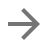

In [15]:
url = f'https://www.google.com/search?q={search_query}'
print(url)
google_search_content = scrape_website(url)
google_search_content

In [16]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def google_search_formated_response(content, max_output_tokens=7815):
  model = GenerativeModel("gemini-pro")

  schema = """
  {
    "places": [
      {
        "name": "",
        "rating": <<float>>,
        "price": "",
        "category": "",
        "address": "",
        "city": "",
        "state": "",
        "zip": "",
        "country": "",
        "phone": "",
        "website": ""
      }
    ]
  }
  """

  responses = model.generate_content(
    f"""Format the below response to the following JSON schema.

    Here's the content:

    {content}

    """,
        generation_config={
            "max_output_tokens": max_output_tokens,
            "temperature": 0,
            "top_p": 1
        },
      stream=True,
      )

  formated_response = []

  for response in responses:
      text = response.candidates[0].content.parts[0].text
      print(text)
      formated_response.append(text)

  return formated_response

formated_response = google_search_formated_response(google_search_content)

```json
{
  "places": [
    {
      "
name": "Pacific Catch",
      "rating": "4.3",

      "price": "$$",
      "category": "Seafood",
      "address": "545 San Antonio Rd Suite 34
",
      "city": "Mountain View",
      "state": "CA",
      "zip": "94043",
      
"country": "United States",
      "url": "/search?sca_esv=0905b5e61dfd1a4f&sca_upv=1&ie=UTF-8&
q=Pacific+Catch+Mountain+View,+CA&ludocid=11530031354653019358&lsig=AB86z5UKA1Q
yk_IMl_EuNnvNi3K3&phdesc=e44nj9qSoZw&sa=X&ved=2ahUKEwjgq5Hp_aGDAxUlSjABHVEPBMYQvS56BAgAEAQ"
    
},
    {
      "name": "The Cookout Food Truck",
      "rating": "4.5",
      "price": "$",
      "category": "Fish & Chips",
      "address": "2534 Old Middlefield Way",
      "city": "
Mountain View",
      "state": "CA",
      "zip": "94043",
      "country": "United States",
      "url": "/search?sca_esv=0905b5e61dfd1a4f&sca_upv
=1&ie=UTF-8&q=The+Cookout+Food+Truck+Mountain+View,+CA&ludocid=11552274259547282965&lsig=AB86z5UQOzQDDMz
YlifmWMwL08IF&phdesc=0

# **Optional - Readability Data Extract**

In [ ]:
!pip install readability-lxml html2text

In [ ]:
import requests
import html2text
from readability import Document

def extract_content(url):
  response = scrape_website(url)
  doc = Document(response)

  return {
      'title': doc.title(),
      'summary': html2text.html2text(doc.summary())
  }

In [ ]:
for result_item in results:
  structured_response.append(extract_content(result_item['href']))

In [ ]:
structured_response

# **Information Extraction**

In [17]:
import re
import json

def extract_json(input_string):
    # Extract JSON within ``` block
    matches = re.findall(r'```(.*?)```', input_string, re.DOTALL)

    if matches:
        # Join the matches into a single string
        json_content = ''.join(matches)

        # Remove periods
        json_content = re.sub(r'\.', '', json_content)

        return json_content
    else:
        print("No ``` block found.")
        return None

In [18]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def execute_prompt(prompt, max_output_tokens=8192):
  model = GenerativeModel("gemini-pro")
  responses = model.generate_content(
    prompt,
    generation_config={
        "max_output_tokens": max_output_tokens,
        "temperature": 0,
        "top_p": 1
    },
  stream=True,
  )

  final_response = []

  for response in responses:
      final_response.append(response.candidates[0].content.parts[0].text)

  return ".".join(final_response)

In [19]:
def get_text_extract_prompt(title, summary):
  prompt = f"""
  Here is its title: {title}
  Here is some text extracted:
  ---------
  {summary}
  ---------

  Web pages can have a lot of useless junk in them.
  For example, there might be a lot of ads, or a
  lot of navigation links, or a lot of text that
  is not relevant to the topic of the page. We want
  to extract only the useful information from the text.

  You can use the url and title to help you understand
  the context of the text.
  Please extract only the useful information from the text.
  Try not to rewrite the text, but instead extract
  only the useful information from the text.
  """
  return prompt

In [20]:
summarries = []

In [21]:
for structured_response_item in structured_response:
    title = structured_response_item['title']
    summary = structured_response_item['summary']
    if summary != "<html><body></body></html>":
      print(f'Summary for Title: {title}\n')
      text_extract_prompt = get_text_extract_prompt(title, summary)
      prompt_response = execute_prompt(text_extract_prompt)
      summarries.append(prompt_response)

Summary for Title: THE BEST 10 Seafood Restaurants near MOUNTAIN VIEW, CA 94043 - Last Updated December 2023 - Yelp

Summary for Title: Googleplex restaurants, addresses, phone numbers, photos, real user reviews, 1600 Amphitheatre Pkwy, Mountain View, CA 94043, USA, Mountain View restaurant recommendations - Trip.com



In [22]:
summarries

['1. Limón: Peruvian seafood and cocktail bar with a focus on fresh seafood. and mouth-watering dishes.\n2. Pacific Catch: Seafood restaurant offering tacos., sushi, and poke bowls, with a focus on sustainable and high-quality seafood.\n3. The Sea by Alexander’s Steakhouse: Upscale. seafood restaurant with a focus on fresh seafood and steak, offering a refined dining experience.\n4. Cap’t Loui: Casual seafood restaurant specializing in fish. and chips, with a focus on large portions and a family-friendly atmosphere.\n5. Rustic House Oyster Bar and Grill: Seafood restaurant with a focus on oysters and grilled seafood, offering a casual and lively atmosphere.\n6. The. City Fish: Seafood restaurant specializing in sandwiches, fish and chips, and other seafood dishes, with a focus on fresh and high-quality ingredients.\n7. Cook’s Seafood: Seafood restaurant and seafood market with a focus on fresh and. sustainable seafood, offering a variety of seafood dishes and a casual atmosphere.\n8. K

# **Link Extractor**

Note - The execution will take time depending upon the response

In [ ]:
for structured_response_item in structured_response:
  title = structured_response_item['title']
  summary = structured_response_item['summary']
  if summary != "<html><body></body></html>":
    print(f'Links Title: {title}\n')
    prompt = f'You are an expert data analyst. Extract all the links from the below content. {summary}.'
    links = execute_prompt(prompt)
    print(links)

# **Topic Extraction**

In [ ]:
topics = []

In [ ]:
def get_topic_extraction_prompt(content):
    prompt = f"""Label the main topic or topics in the following text: {content}"""
    prompt = prompt + """1. Identify and list the primary topic or category or provide a short description of the main subject matter of the text.
      2. If there are subtopics or secondary themes mentioned in the text, list them as well. If the text discusses multiple topics, provide a list of these topics and describe their relevance.
      3. Consider the context and tone of the text to determine the most appropriate topics. Take into account keywords, phrases, or specific terms that relate to the topics.
      4. If any notable entities (people, places, brands, products, etc.) are mentioned in the text that play a role in the topics, mention them and their associations.
      5. If the text suggests any actions, decisions, or recommendations related to the identified topics, provide a brief summary of these insights.

      Ensure that your labeling is clear, concise, and reflects the most significant topics or categories found in the text.

      Here's the output schema:

      ```
      {
          "Topic": "",
          "Subtopics": [""],
          "Context": "",
          "NotableEntities": [],
          "Recommendations": ""
      }
      ```

      Do not respond with your own suggestions or recommendations or feedback."""
    return prompt


In [ ]:
for structured_response_item in structured_response:
  title = structured_response_item['title']
  summary = structured_response_item['summary']
  if summary != "<html><body></body></html>":
    print(f'Topics: {title}\n')
    prompt = get_topic_extraction_prompt(summary)
    response = execute_prompt(prompt)
    print(response)
    extracted_json = extract_json(response)
    if extracted_json != None:
      topics.append(extracted_json)

Topics: THE BEST 10 Seafood Restaurants near MOUNTAIN VIEW, CA 94043 - Last Updated December 2023 - Yelp

```
{
  "Topic": "Seafood Restaurants",
  "Sub.topics": [
    "Top 10 Seafood Restaurants near Mountain View,. CA 94043",
    "Related Searches in Mountain View, CA",
    "Trending Searches in Mountain View, CA",
    ."Related Articles",
    "Frequently Asked Questions and Answers"
  ],
  "Context": "The text is a Yelp page that lists the top. 10 seafood restaurants near Mountain View, CA. It also includes related searches, trending searches, related articles, and frequently asked questions about seafood restaurants in the area.",
  "NotableEntities": [
    "Yelp",
.    "Mountain View, CA",
    "Limón",
    "Pacific Catch",
    "The Sea by Alexander's Steakhouse",
    "La Marea of the Sea",
    "Cap't Lou.i",
    "Rustic House Oyster Bar and Grill - Los Altos",
    "King's Fish House - San Jose",
    "The City Fish",
    "Cook's Seafood",
    "Gochi - Mountain View"
  ],
  "Recomme

In [ ]:
topics

['\n{\n  "Topic": "Seafood Restaurants",\n  "Subtopics": [\n    "Top 10 Seafood Restaurants near Mountain View, CA 94043",\n    "Related Searches in Mountain View, CA",\n    "Trending Searches in Mountain View, CA",\n    "Related Articles",\n    "Frequently Asked Questions and Answers"\n  ],\n  "Context": "The text is a Yelp page that lists the top 10 seafood restaurants near Mountain View, CA It also includes related searches, trending searches, related articles, and frequently asked questions about seafood restaurants in the area",\n  "NotableEntities": [\n    "Yelp",\n    "Mountain View, CA",\n    "Limón",\n    "Pacific Catch",\n    "The Sea by Alexander\'s Steakhouse",\n    "La Marea of the Sea",\n    "Cap\'t Loui",\n    "Rustic House Oyster Bar and Grill - Los Altos",\n    "King\'s Fish House - San Jose",\n    "The City Fish",\n    "Cook\'s Seafood",\n    "Gochi - Mountain View"\n  ],\n  "Recommendations": []\n}\n',
 '\n{\n  "Topic": "Googleplex",\n  "Subtopics": [\n    "Reviews o

# **Keyword Extraction**

In [ ]:
keywords = []

In [ ]:
def get_keyword_extraction_prompt(content):
    prompt = f"""Extract key keywords or phrases from the following text: {content}"""
    prompt = prompt + """1. Identify and list the most important keywords or key phrases in the text. These keywords should capture the main topics, concepts, or subjects discussed in the text.
      2. If there are subtopics or secondary themes mentioned in the text, list them as well. Ensure that the extracted keywords accurately represent the content's context.
      3. Include the exact text span or sentence where each keyword or phrase is found in the original text.
      4. If there are any ambiguous keywords or phrases, indicate the uncertainty and provide possible interpretations or context that might clarify the intended meaning.
      5. Consider the context, relevance, and frequency of the keywords when determining their significance.
      6. If the text suggests any actions, decisions, or recommendations related to the extracted keywords, provide a brief summary of these insights.

      Ensure that your keyword extraction results are relevant, concise, and capture the essential topics within the text.

      Here's the output schema:

      ```
      {
          "KeywordExtraction": [
              {
                  "Keyword": "",
                  "Context": "",
                  "TextSpan": ""
              }
          ]
      }
      ```

      Do not respond with your own suggestions or recommendations or feedback.
    """
    return prompt


In [ ]:
summarries

['1. Limón: Peruvian and seafood restaurant with a focus on seafood and cocktails..\n2. Pacific Catch: Seafood restaurant offering tacos, sushi, and poke. bowls.\n3. The Sea by Alexander’s Steakhouse: Seafood and steakhouse with a focus on fresh seafood.\n4. La Marea of. the Sea: Seafood food stand offering oysters, shrimp cocktail, and fish ceviche.\n5. Cap’t Loui: Seafood restaurant specializing in fish and. chips and Cajun/Creole cuisine.\n6. Rustic House Oyster Bar and Grill - Los Altos: Seafood restaurant with a focus on oysters and grilled fish.\n7. King’s Fish House - San Jose: Seafood restaurant offering a. wide variety of seafood dishes.\n8. The City Fish: Seafood restaurant specializing in sandwiches, fish and chips, and seafood markets.\n9. Cook’s Seafood: Seafood restaurant and seafood market offering a variety of seafood dishes.\n.10. Gochi - Mountain View: Japanese restaurant offering seafood, wine, and sashimi.',
 '- Googleplex is located at 1600 Amphitheatre Pkwy,. Moun

In [ ]:
for summary in summarries:
  if summary != "":
    prompt = get_keyword_extraction_prompt(summary)
    response = execute_prompt(prompt)
    extracted_json = extract_json(response)
    if extracted_json != None:
      keywords.append(extracted_json)

In [ ]:
keywords

['\n{\n  "KeywordExtraction": [\n    {\n      "Keyword": "Seafood",\n      "Context": "Limón: Peruvian and seafood restaurant with a focus on seafood and cocktails",\n      "TextSpan": "Limón: Peruvian and seafood restaurant with a focus on seafood and cocktails"\n    },\n    {\n      "Keyword": "Cocktails",\n      "Context": "Limón: Peruvian and seafood restaurant with a focus on seafood and cocktails",\n      "TextSpan": "Limón: Peruvian and seafood restaurant with a focus on seafood and cocktails"\n    },\n    {\n      "Keyword": "Tacos",\n      "Context": "Pacific Catch: Seafood restaurant offering tacos, sushi, and poke bowls",\n      "TextSpan": "Pacific Catch: Seafood restaurant offering tacos, sushi, and poke bowls"\n    },\n    {\n      "Keyword": "Sushi",\n      "Context": "Pacific Catch: Seafood restaurant offering tacos, sushi, and poke bowls",\n      "TextSpan": "Pacific Catch: Seafood restaurant offering tacos, sushi, and poke bowls"\n    },\n    {\n      "Keyword": "Poke

# **Automated Tagger**

In [ ]:
taggers = []

In [ ]:
def get_automated_tagger_extraction_prompt(content):
    prompt = f"""Automate the tagging of the following unstructured data: {content}"""
    prompt = prompt + """1. Identify and extract the most relevant tags, keywords, or categories for the given data. These tags should succinctly represent the content's main themes, subjects, or topics.
        2. List the extracted tags, and provide a brief description or rationale for each tag to help users understand their significance.
        3. If there are subcategories or hierarchies in the tags, ensure that they are appropriately nested or organized.
        4. Consider the context, content, and domain-specific knowledge when selecting tags. Ensure that the tags accurately reflect the essence of the data.
        5. If any tags are ambiguous or could have multiple interpretations, address these challenges and provide explanations for the chosen tags.
        6. If there are specific tasks or analyses where the tagged data will be used, describe these use cases and how the tags are expected to be applied.
        7. If the data contains temporal or dynamic elements, mention any trends, changes, or time-sensitive aspects that might impact the tags.

        Ensure that your automated tagging results are clear, relevant, and make the data more accessible and useful.

        Here's the output schema:

        ```
        {
            "AutomatedTagging": {
                "Tags": [
                    {
                        "Tag": "",
                        "Sentences": []
                    }
                ]
            }
        }
        ```

        Do not respond with your own suggestions or recommendations or feedback.
    """
    return prompt


In [ ]:
for summary in summarries:
  if summary != "":
    prompt = get_automated_tagger_extraction_prompt(summary)
    response = execute_prompt(prompt)
    extracted_json = extract_json(response)
    if extracted_json != None:
      taggers.append(extracted_json)

In [ ]:
taggers

['\n{\n  "AutomatedTagging": {\n    "Tags": [\n      {\n        "Tag": "Seafood",\n        "Sentences": [\n          "Limón: Peruvian and seafood restaurant with a focus on seafood and cocktails",\n          "Pacific Catch: Seafood restaurant offering tacos, sushi, and poke bowls",\n          "The Sea by Alexander\\u2019s Steakhouse: Seafood and steakhouse with a focus on fresh seafood",\n          "La Marea of the Sea: Seafood food stand offering oysters, shrimp cocktail, and fish ceviche",\n          "Cap\\u2019t Loui: Seafood restaurant specializing in fish and chips and Cajun/Creole cuisine",\n          "Rustic House Oyster Bar and Grill - Los Altos: Seafood restaurant with a focus on oysters and grilled fish",\n          "King\\u2019s Fish House - San Jose: Seafood restaurant offering a wide variety of seafood dishes",\n          "The City Fish: Seafood restaurant specializing in sandwiches, fish and chips, and seafood markets",\n          "Cook\\u2019s Seafood: Seafood restaurant

# **Intent Extraction**

In [ ]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def get_intent_extraction_prompt(content):
  schema = """
  ```"intents":[
    "intent": "",
    "statement": ""
  ]```
  """
  prompt = f"""You are an expert intent detector. Your job is to detect and list down all the intents within the below content. Output the same in the specified JSON schema format.
    Here's the content:
    ---
    {content}
    ---
    Here's the schema:
    {schema}
    Do not respond with your own suggestions or recommendations or feedback.
 """
  return prompt

In [ ]:
intents = []

In [ ]:
instruct_prompt = f"get me the summary for the following content"
prompt = get_intent_extraction_prompt(instruct_prompt)
response = execute_prompt(prompt)
extracted_json = extract_json(response)
if extracted_json != None:
  intents.append(extracted_json)

In [ ]:
intents

['\n{\n  "intents": [\n    {\n      "intent": "GetSummary",\n      "statement": "get me the summary for the following content"\n    }\n  ]\n}\n']

# **Content Classification**

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gen-lang-client-0341374211-e19d6530e26f.json"

In [ ]:
from google.cloud import language_v1

def classify_text(text_content, language = "en"):
    classification_response = []
    client = language_v1.LanguageServiceClient()
    type_ = language_v1.Document.Type.PLAIN_TEXT
    document = {"content": text_content, "type_": type_, "language": language}

    content_categories_version = (
        language_v1.ClassificationModelOptions.V2Model.ContentCategoriesVersion.V2
    )
    response = client.classify_text(
        request={
            "document": document,
            "classification_model_options": {
                "v2_model": {"content_categories_version": content_categories_version}
            },
        }
    )

    for category in response.categories:
        classification_response.append({
            'category': category.name,
            'confidence': category.confidence
        })
    return classification_response

In [ ]:
if len(summarries) > 0:
  classification_response = classify_text(summarries[0])
  print(classification_response)

[{'category': '/Food & Drink/Food/Meat & Seafood', 'confidence': 0.7320996522903442}, {'category': '/Food & Drink/Restaurants/Other', 'confidence': 0.4745289385318756}]


# **User Location Info**

In [ ]:
!pip install geopy folium

In [ ]:
address = '1600 Amphitheatre Parkway, Mountain View, CA'

In [ ]:
from geopy.geocoders import Nominatim
import folium

def get_user_location(address):
    # Initialize a geolocator using Nominatim
    geolocator = Nominatim(user_agent="user_location_app")

    # Get the location information (latitude, longitude, and address)
    location = geolocator.geocode(address)

    if location:
        return location.latitude, location.longitude, location.address
    else:
        return None

In [ ]:
location_info = get_user_location(address)

if location_info:
    latitude, longitude, formatted_address = location_info
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")
    print(f"Formatted Address: {formatted_address}")
else:
    print("Location not found.")

Latitude: 37.4217636
Longitude: -122.084614
Formatted Address: Google Headquarters, 1600, Amphitheatre Parkway, Mountain View, Santa Clara County, California, 94043, United States


# **Retrieval-augmented generation (RAG)**

In [23]:
!pip install -U -q google.generativeai

In [24]:
%pip install -Uq chromadb pydantic typing-extensions==4.6.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.6.0 which is incompatible.
trulens-eval 0.18.0 requires typing-extensions==4.5.0, but you have typing-extensions 4.6.0 which is incompatible.


In [25]:
import textwrap
import chromadb
import numpy as np
import pandas as pd
from google.colab import userdata

import google.generativeai as genai
import google.ai.generativelanguage as glm

# Used to securely store your API key
from google.colab import userdata

from IPython.display import Markdown
from chromadb import Documents, EmbeddingFunction, Embeddings
genai.configure(api_key=userdata.get('google_key'))

In [26]:
collection_name = 'localstore'

In [27]:
class GeminiEmbeddingFunction(EmbeddingFunction):
  def __call__(self, input: Documents) -> Embeddings:
    model = 'models/embedding-001'
    title = "Custom query"
    return genai.embed_content(model=model,
                                content=input,
                                task_type="retrieval_document",
                                title=title)["embedding"]
def create_chroma_db(documents, name):
  chroma_client = chromadb.Client()
  db = chroma_client.create_collection(name=name, embedding_function=GeminiEmbeddingFunction())

  for i, d in enumerate(documents):
    db.add(
      documents=d,
      ids=str(i)
    )
  return db

In [28]:
# Set up the DB
db = create_chroma_db(summarries, collection_name)

In [29]:
pd.DataFrame(db.peek(3))

,ids,embeddings,metadatas,documents,uris,data
0,0,"[0.058169543743133545, -0.05552861839532852, -...",None,1. Limón: Peruvian seafood and cocktail bar wi...,None,None
1,1,"[0.038881026208400726, -0.018561283126473427, ...",None,- Googleplex is located at 1600 Amphitheatre P...,None,None


In [30]:
def get_relevant_passage(query, db):
  passage = db.query(query_texts=[query], n_results=1)['documents'][0][0]
  return passage

In [31]:
def make_prompt(query, relevant_passage):
  escaped = relevant_passage.replace("'", "").replace('"', "").replace("\n", " ")
  prompt = ("""You are a helpful and informative bot that answers questions using text from the reference passage included below. \
  If the passage is irrelevant to the answer, you may ignore it.
  QUESTION: '{query}'
  PASSAGE: '{relevant_passage}'

    ANSWER:
  """).format(query=query, relevant_passage=escaped)

  return prompt

In [32]:
query = "where can I get seafood"
passage = get_relevant_passage(query, db)
Markdown(passage)
prompt = make_prompt(query, passage)
Markdown(prompt)

You are a helpful and informative bot that answers questions using text from the reference passage included below.   If the passage is irrelevant to the answer, you may ignore it.
  QUESTION: 'where can I get seafood'
  PASSAGE: '1. Limón: Peruvian seafood and cocktail bar with a focus on fresh seafood. and mouth-watering dishes. 2. Pacific Catch: Seafood restaurant offering tacos., sushi, and poke bowls, with a focus on sustainable and high-quality seafood. 3. The Sea by Alexander’s Steakhouse: Upscale. seafood restaurant with a focus on fresh seafood and steak, offering a refined dining experience. 4. Cap’t Loui: Casual seafood restaurant specializing in fish. and chips, with a focus on large portions and a family-friendly atmosphere. 5. Rustic House Oyster Bar and Grill: Seafood restaurant with a focus on oysters and grilled seafood, offering a casual and lively atmosphere. 6. The. City Fish: Seafood restaurant specializing in sandwiches, fish and chips, and other seafood dishes, with a focus on fresh and high-quality ingredients. 7. Cook’s Seafood: Seafood restaurant and seafood market with a focus on fresh and. sustainable seafood, offering a variety of seafood dishes and a casual atmosphere. 8. King’s Fish House: Upscale seafood restaurant with a focus on fresh and sustainable seafood, offering a variety of seafood dishes and a refined dining experience. 9. La Marea of the Sea: Casual seafood stand with a focus. on fresh and affordable seafood, offering a variety of seafood dishes and a casual atmosphere. 10. Supreme Crab: Casual seafood restaurant specializing in Cajun-style seafood, with a focus on crab and other seafood dishes.'

    ANSWER:
  

In [33]:
model = genai.GenerativeModel('gemini-pro')
answer = model.generate_content(prompt)
Markdown(answer.text)

1. Limón
2. Pacific Catch
3. The Sea by Alexander’s Steakhouse
4. Cap’t Loui
5. Rustic House Oyster Bar and Grill
6. The City Fish
7. Cook’s Seafood
8. King’s Fish House
9. La Marea of the Sea
10. Supreme Crab

# **Trulens Custom LLM Evaluation**

**Please make sure to run the Retrieval-augmented generation (RAG) to set the Db**

In [34]:
!pip install litellm
!pip install trulens_eval==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.0
    Uninstalling typing_extensions-4.6.0:
      Successfully uninstalled typing_extensions-4.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<

**Note - You must restart the runtime in order to use newly installed versions.**

In [34]:
from IPython.display import JSON
from trulens_eval import Feedback, Tru
tru = Tru()
tru.reset_database()

🦑 Tru initialized with db url sqlite:///default.sqlite .
🛑 Secret keys may be written to the database. See the `database_redact_keys` option of `Tru` to prevent this.


In [35]:
from google.cloud import aiplatform
aiplatform.init(
    project = PROJECT_ID,
    location= LOCATION
)

In [36]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('google_key')

genai.configure(api_key=GOOGLE_API_KEY)

In [37]:
import litellm
litellm.vertex_project = PROJECT_ID
litellm.vertex_location = LOCATION

In [38]:
from trulens_eval.feedback.provider.litellm import LiteLLM
litellm_provider = LiteLLM()

In [39]:
import litellm
from trulens_eval.tru_custom_app import instrument

class Gemini_RAG:
    def get_relevant_passage(self, query):
      passage = db.query(query_texts=[query], n_results=1)['documents'][0][0]
      return passage

    def make_prompt(query, relevant_passage):
      escaped = relevant_passage.replace("'", "").replace('"', "").replace("\n", " ")
      prompt = ("""You are a helpful and informative bot that answers questions using text from the reference passage included below. \
      If the passage is irrelevant to the answer, you may ignore it.
      QUESTION: '{query}'
      PASSAGE: '{relevant_passage}'

        ANSWER:
      """).format(query=query, relevant_passage=escaped)

      return prompt

    @instrument
    def generate_completion(self, query: str, context_str: list) -> str:
        """
        Generate answer from context.
        """
        response = litellm.completion(model="gemini-pro", messages= [
            {"role": "user",
            "content":
            f"We have provided context information below. \n"
            f"---------------------\n"
            f"{context_str}"
            f"\n---------------------\n"
            f"Given this information, please answer the question: {query}"
            }
        ])

        content = ''
        if response != None and len(response.choices) > 0:
          content = response.choices[0].message.content
          print(content)

        return content

    @instrument
    def query(self, query: str) -> str:
        passage = self.get_relevant_passage(query)
        Markdown(passage)
        prompt = make_prompt(query, passage)
        Markdown(prompt)
        completion = self.generate_completion(query, prompt)
        return completion

# Please make sure to run the Retrieval-augmented generation (RAG) to set the Db
rag = Gemini_RAG()

In [40]:
import numpy as np
from trulens_eval import TruLlama, Feedback, Tru, feedback
from trulens_eval.feedback import GroundTruthAgreement, Groundedness

# Define groundedness
grounded = Groundedness(groundedness_provider=litellm_provider)
f_groundedness = Feedback(grounded.groundedness_measure, name = "Groundedness").on(
    TruLlama.select_source_nodes().node.text # context
).on_output().aggregate(grounded.grounded_statements_aggregator)

# Question/answer relevance between overall question and answer.
f_qa_relevance = Feedback(litellm_provider.relevance, name = "Answer Relevance").on_input_output()

# Question/statement relevance between question and each context chunk.
f_qs_relevance = Feedback(litellm_provider.qs_relevance, name = "Context Relevance").on_input().on(
    TruLlama.select_source_nodes().node.text
).aggregate(np.mean)

✅ In Groundedness, input source will be set to __record__.app.query.rets.source_nodes[:].node.text .
✅ In Groundedness, input statement will be set to __record__.main_output or `Select.RecordOutput` .
✅ In Answer Relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In Answer Relevance, input response will be set to __record__.main_output or `Select.RecordOutput` .
✅ In Context Relevance, input question will be set to __record__.main_input or `Select.RecordInput` .
✅ In Context Relevance, input statement will be set to __record__.app.query.rets.source_nodes[:].node.text .


In [41]:
app_id = 'Personally.AIStore'

In [42]:
from trulens_eval import TruCustomApp
tru_rag = TruCustomApp(rag,
    app_id = app_id,
    feedbacks = [f_groundedness, f_qa_relevance])

In [45]:
# Need to check with Trulens team as the library is expecting OpenAI Key
# OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('openai_key')

In [46]:
with tru_rag as recording:
    rag.query("where can I get seafood")

1. Limón
2. Pacific Catch
3. The Sea by Alexander’s Steakhouse
4. Cap’t Loui
5. Rustic House Oyster Bar and Grill
6. The City Fish
7. Cook’s Seafood
8. King’s Fish House
9. La Marea of the Sea
10. Supreme Crab
Could not locate app.query.rets.source_nodes[:].node.text in app/record.


ERROR:concurrent.futures:exception calling callback for <Future at 0x7b0f3ef88d00 state=finished raised RuntimeError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/trulens_eval/feedback/feedback.py", line 669, in extract_selection
    arg_vals[k] = list(q_within_o.get(o))
  File "/usr/local/lib/python3.10/dist-packages/trulens_eval/utils/serial.py", line 851, in get
    for start_selection in start_items:
  File "/usr/local/lib/python3.10/dist-packages/trulens_eval/utils/serial.py", line 851, in get
    for start_selection in start_items:
  File "/usr/local/lib/python3.10/dist-packages/trulens_eval/utils/serial.py", line 851, in get
    for start_selection in start_items:
  File "/usr/local/lib/python3.10/dist-packages/trulens_eval/utils/serial.py", line 852, in get
    for last_selection in last_step.get(start_selection):
  File "/usr/local/lib/python3.10/dist-packages/trulens_eval/utils/serial.py", line 321, in get
    for r in self.get(obj=obj[0]

In [83]:
tru.get_leaderboard(app_ids=[app_id])

,latency,total_cost
app_id,,
Personally.AIStore,7.5,0.0


In [47]:
tru.get_records_and_feedback(app_ids=[app_id])

(               app_id                                           app_json  \
 0  Personally.AIStore  {"app_id": "Personally.AIStore", "tags": "-", ...   
 
                    type                                     record_id  \
 0  Gemini_RAG(__main__)  record_hash_1bb3999e0cd224c3c5f80eb44e67a5c9   
 
                        input  \
 0  "where can I get seafood"   
 
                                               output tags  \
 0  "1. Lim\u00f3n\n2. Pacific Catch\n3. The Sea b...    -   
 
                                          record_json  \
 0  {"record_id": "record_hash_1bb3999e0cd224c3c5f...   
 
                                            cost_json  \
 0  {"n_requests": 0, "n_successful_requests": 0, ...   
 
                                            perf_json  \
 0  {"start_time": "2023-12-22T02:27:07.369211", "...   
 
                            ts  latency  total_tokens  total_cost  
 0  2023-12-22T02:27:15.792313        8             0         0.0  ,
 [])

# **User Preferences**

In [85]:
user_albert_preference = {
    "prompt_template":{
        "summary_template_1": """
            You are an expert summary generator. Generate a clean and consise summary in less than 100 lines.

            Prompt 1: Identify key sections in the text for summary generation
            Prompt 2: Extract key information from the introduction section
            Prompt 3: Parse out the main objective or purpose of the text
            Prompt 4: Identify any key findings or conclusions discussed in the text
            Prompt 5: Summarize the main arguments or points presented in the text
            Prompt 6: Summarize the overall tone or attitude of the text

            Output the summary as per the below schema.
            {
              "summary": "",
              "highlights": []
              "keywords": []
            }

        """,
        "summary_template_2": """
          1. Present a brief snapshot of the content to be summarized.
          2. Uncover the essential insights, emphasizing the core elements.
          3. Illuminate the primary theme or objective that underlies the material.
          4. Incorporate pertinent details that enrich the overall context.
          5. Emphasize the necessity for brevity, focusing on the key information.
          6. Stress the importance of a clear and coherent flow in the summary.
          7. Encourage the exclusion of repetitive information for a streamlined summary.
        """
    }
}

In [87]:
text_to_summarize = ''
url = 'https://www.yelp.com/search?cflt=seafood&find_loc=Mountain+View%2C+CA+94043'
response = await do_webscraping(url)
if response != None:
  text_to_summarize = response['summary']
text_to_summarize

Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.46s/it]


'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recommended\n\nAll

In [88]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def generate_summary(text_to_summarize, max_output_tokens):
  model = GenerativeModel("gemini-pro")
  responses = model.generate_content(f"""You are an expert summary generator. Please follow the below rules for the summary generation.
          {user_albert_preference['prompt_template']['summary_template_1']}
          Here's the content:
          {text_to_summarize}
           """,
    generation_config={
        "max_output_tokens": max_output_tokens,
        "temperature": 0.9,
        "top_p": 1
    },
  stream=True,
  )

  for response in responses:
      print(response.candidates[0].content.parts[0].text)

generate_summary(text_to_summarize, 8000)

{
  "summary": "The given article lists top-rated seafood restaurants
 near Mountain View, California, along with their user ratings and reviews. The restaurants
 offer various seafood dishes, including Peruvian cuisine, tacos, sushi, poke, and more. Some popular choices include Lim\u00f3n, Pacific
 Catch, Cap\u2019t Loui, The Sea by Alexander\u2019s Steakhouse, and Rustic House Oyster Bar
 and Grill. The restaurants provide services such as takeout, delivery, reservations, and outdoor seating. Users have praised the quality, freshness, and variety of seafood offered by these establishments.",
  "highlights": [
    "Top-rated
 seafood restaurants near Mountain View, California, are listed with user ratings and reviews.",
    "Variety of seafood dishes, including Peruvian cuisine, tacos, sushi, poke, and more, are available.",
    "Popular choices include Lim\
u00f3n, Pacific Catch, Cap\u2019t Loui, The Sea by Alexander\u2019s Steakhouse, and Rustic House Oyster Bar and Grill.",
    "Se

# **Chat Basic**

In [52]:
text_to_summarize = ''
url = 'https://www.yelp.com/search?cflt=seafood&find_loc=Mountain+View%2C+CA+94043'
response = await do_webscraping(url)
if response != None:
  text_to_summarize = response['summary']
text_to_summarize

Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.56s/it]


'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recommended\n\nAll

In [53]:
text_to_summarize

'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recommended\n\nAll

In [54]:
import vertexai
from IPython.display import Markdown
from vertexai.preview.generative_models import GenerativeModel, ChatSession
vertexai.init(project=PROJECT_ID, location=LOCATION)

model = GenerativeModel("gemini-pro")
chat = model.start_chat()

def do_gemini_chat(chat: ChatSession, prompt: str) -> str:
    response = chat.send_message(prompt)
    return response.text

prompt = "Hello."
Markdown(do_gemini_chat(chat, prompt))

prompt = f"""You are an expert summary generator. Please follow the below rules for the summary generation.
          {user_albert_preference['prompt_template']['summary_template_1']}
          Here's the content:
          {text_to_summarize}
           """
Markdown(do_gemini_chat(chat, prompt))

{
 "summary": "Here is a list of the best 10 seafood restaurants near Mountain View, CA 94043. The list includes Lim\u00f3n, Pacific Catch, The Sea by Alexander\u2019s Steakhouse, Cap\u2019t Loui, La Marea of the Sea, Rustic House Oyster Bar and Grill - Los Altos, King\u2019s Fish House - San Jose, The City Fish, Cook\u2019s Seafood, and Gochi - Mountain View.",
 "highlights": [],
 "keywords": [
  "Seafood",
  "Restaurants",
  "Mountain View",
  "California",
  "Lim\u00f3n",
  "Pacific Catch",
  "The Sea by Alexander\u2019s Steakhouse",
  "Cap\u2019t Loui",
  "La Marea of the Sea",
  "Rustic House Oyster Bar and Grill - Los Altos",
  "King\u2019s Fish House - San Jose",
  "The City Fish",
  "Cook\u2019s Seafood",
  "Gochi - Mountain View"
 ]
}

In [55]:
chat.history

[role: "user"
 parts {
   text: "Hello."
 },
 role: "model"
 parts {
   text: "Hello! How may I assist you?"
 },
 role: "user"
 parts {
   text: "You are an expert summary generator. Please follow the below rules for the summary generation.\n          \n            You are an expert summary generator. Generate a clean and consise summary in less than 100 lines.\n\n            Prompt 1: Identify key sections in the text for summary generation\n            Prompt 2: Extract key information from the introduction section\n            Prompt 3: Parse out the main objective or purpose of the text\n            Prompt 4: Identify any key findings or conclusions discussed in the text\n            Prompt 5: Summarize the main arguments or points presented in the text\n            Prompt 6: Summarize the overall tone or attitude of the text\n\n            Output the summary as per the below schema.\n            {\n              \"summary\": \"\",\n              \"highlights\": []\n              \

## **User Preferences**

In [78]:
user_albert_preference = {
    "prompt_template":{
        "summary_template_1": """
            You are an expert summary generator. Generate a clean and consise summary in less than 100 lines.

            Prompt 1: Identify key sections in the text for summary generation
            Prompt 2: Extract key information from the introduction section
            Prompt 3: Parse out the main objective or purpose of the text
            Prompt 4: Identify any key findings or conclusions discussed in the text
            Prompt 5: Summarize the main arguments or points presented in the text
            Prompt 6: Summarize the overall tone or attitude of the text

            Output the summary as per the below schema.
            {
              "summary": "",
              "highlights": []
              "keywords": []
            }

        """,
        "summary_template_2": """
          1. Present a brief snapshot of the content to be summarized.
          2. Uncover the essential insights, emphasizing the core elements.
          3. Illuminate the primary theme or objective that underlies the material.
          4. Incorporate pertinent details that enrich the overall context.
          5. Emphasize the necessity for brevity, focusing on the key information.
          6. Stress the importance of a clear and coherent flow in the summary.
          7. Encourage the exclusion of repetitive information for a streamlined summary.
        """
    }
}

In [79]:
text_to_summarize = ''
url = 'https://www.yelp.com/search?cflt=seafood&find_loc=Mountain+View%2C+CA+94043'
response = await do_webscraping(url)
if response != None:
  text_to_summarize = response['summary']
text_to_summarize

Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.41s/it]
ERROR:trulens_eval.feedback.provider.endpoint.base:litellm request failed <class 'AssertionError'>=. Retries remaining=2.


'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recommended\n\nAll

In [80]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def generate_summary(text_to_summarize, max_output_tokens):
  model = GenerativeModel("gemini-pro")
  responses = model.generate_content(f"""You are an expert summary generator. Please follow the below rules for the summary generation.
          {user_albert_preference['prompt_template']['summary_template_1']}
          Here's the content:
          {text_to_summarize}
           """,
    generation_config={
        "max_output_tokens": max_output_tokens,
        "temperature": 0.9,
        "top_p": 1
    },
  stream=True,
  )

  for response in responses:
      print(response.candidates[0].content.parts[0].text)

generate_summary(text_to_summarize, 8000)

{
 "summary": "This article lists top-rated seafood restaurants near Mountain
 View, California, along with their user ratings and reviews. The restaurants include Limon
, Pacific Catch, Cap't Loui, The Sea by Alexander's Steakhouse, Rustic House Oyster Bar and Grill, The City Fish, Cook'
s Seafood, La Marea of the Sea, King's Fish House, and Supreme Crab. The list is based on user ratings and reviews.",
 "


ERROR:trulens_eval.feedback.provider.endpoint.base:litellm request failed <class 'AssertionError'>=. Retries remaining=1.


highlights": [
  "List of top-rated seafood restaurants near Mountain View, California, with user ratings and reviews.",
  "Includes restaurants like Limon, Pacific Catch, Cap't Loui, The Sea by Alexander's
 Steakhouse, and more.",
  "Based on user ratings and reviews, these restaurants offer a variety of seafood options and a range of dining experiences."
 ],
 "keywords": [
  "Seafood restaurants",
  "Mountain
 View, California",
  "Limon",
  "Pacific Catch",
  "Cap't Loui",
  "The Sea by Alexander's Steakhouse",
  "Rustic House Oyster Bar and Grill",
  "The City Fish",
  "Cook's Seafood",
  "La Marea of the Sea",
  "King's
 Fish House",
  "Supreme Crab"
 ]
}


# **Chat with Langchain**

In [4]:
!pip install -U google-cloud-aiplatform
!pip install -U langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00


In [12]:
import vertexai
from IPython.display import Markdown
from vertexai.preview.generative_models import GenerativeModel, ChatSession
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [6]:
from langchain.chat_models import ChatVertexAI
from langchain.prompts import ChatPromptTemplate

In [47]:
text_to_summarize = ''
url = 'https://www.yelp.com/search?cflt=seafood&find_loc=Mountain+View%2C+CA+94043'
response = await do_webscraping(url)
if response != None:
  text_to_summarize = response['summary']
text_to_summarize

Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.42s/it]


'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recommended\n\nAll

In [48]:
text_to_summarize

'Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRestaurants\n\nDelivery\n\nBurgers\n\nChinese\n\nItalian\n\nReservations\n\nJapanese\n\nMexican\n\nThai\n\nHome Services\n\nContractors\n\nElectricians\n\nHome Cleaners\n\nHVAC\n\nLandscaping\n\nLocksmiths\n\nMovers\n\nPlumbers\n\nAuto Services\n\nAuto Repair\n\nAuto Detailing\n\nBody Shops\n\nCar Wash\n\nCar Dealers\n\nOil Change\n\nParking\n\nTowing\n\nMore\n\nDry Cleaning\n\nPhone Repair\n\nBars\n\nNightlife\n\nHair Salons\n\nGyms\n\nMassage\n\nShopping\n\nMore\n\nFilters\n\n$$$$$$$$$$\n\nSuggested\n\nOpen Now\n\n\\--:--\n\nOffers Delivery\n\nReservations\n\nFree Wi-Fi\n\nOutdoor Seating\n\nDogs Allowed\n\nFeatures\n\nOffers Takeout\n\nGood for Groups\n\nGood for Dinner\n\nGood for Kids\n\nSee all\n\nDistance\n\nBird\'s-eye View\n\nDriving (5 mi.)\n\nBiking (2 mi.)\n\nWalking (1 mi.)\n\nWithin 4 blocks\n\nYelpRestaurantsSeafood\n\n# The Best 10 Seafood Restaurants near Mountain View, CA 94043\n\nSort:Recommended\n\nAll

In [61]:
system = "You are a helpful assistant"
human = f"""You are an expert summary generator. Please generate the summary for the below content.
          Here's the content:
          {text_to_summarize}
           """

In [57]:
human

'You are an expert summary generator. Please follow the below rules for the summary generation.\n          \n            You are an expert summary generator. Generate a clean and consise summary in less than 100 lines.\n\n            Prompt 1: Identify key sections in the text for summary generation\n            Prompt 2: Extract key information from the introduction section\n            Prompt 3: Parse out the main objective or purpose of the text\n            Prompt 4: Identify any key findings or conclusions discussed in the text\n            Prompt 5: Summarize the main arguments or points presented in the text\n            Prompt 6: Summarize the overall tone or attitude of the text\n\n            Output the summary as per the below schema.\n            {\n              "summary": "",\n              "highlights": []\n              "keywords": []\n            }\n\n        \n          Here\'s the content:\n          Yelp\n\nYelp for Business\n\nWrite a Review\n\nLog InSign Up\n\nRes

In [60]:
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chat = ChatVertexAI()

chain = prompt | chat
chain.invoke({})

AIMessage(content=" Here's a summary of the content provided:\n\nYelp is a platform that allows users to find and review local businesses. This particular page focuses on seafood restaurants in Mountain View, California. It lists the top 10 seafood restaurants in the area, along with their ratings, reviews, and other relevant information such as price range, location, and amenities. The page also includes a map of the area, filters to narrow down the search results, and related searches for users to explore. Additionally, there are frequently asked questions and answers, as well as information about nearby cities and popular locations for seafood.")